In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg

import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)
df_2 = df.drop(['Potability_det', 'Unnamed: 0'], axis=1)
df_
# Initialisation du normalisateur
scaler = StandardScaler()

# Ajustement aux données et transformation
normalized_data = scaler.fit_transform(df_)

# Convertir en DataFrame Pandas
normalized_df = pd.DataFrame(normalized_data, index=df_.index, columns=df_.columns)
normalized_df= normalized_df.drop(['Potability_det'], axis=1)

normalized_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.000990,0.717454,0.015724,-0.799439,0.010591,-0.335680,-0.816253,2.858068,-1.234154
1,-0.200832,-0.084328,-0.968896,-1.246577,-0.267658,0.652954,0.247520,-0.006426,-0.909709
2,-0.721306,-0.364575,-0.707731,0.655997,2.439675,-1.382269,1.821607,1.071225,1.141856
3,0.683305,0.696445,-0.457153,-0.594864,0.010591,-0.609177,1.052800,-0.410202,0.395695
4,0.666584,0.427671,-0.603564,1.055249,0.723456,1.666209,0.908313,0.139407,1.414489
...,...,...,...,...,...,...,...,...,...
2288,0.701312,0.342618,0.509390,0.894705,-0.424658,0.076885,-1.243325,-0.156577,0.960669
2289,2.227682,2.044504,1.966394,-2.495781,-1.320051,0.596371,-0.277931,-0.073499,2.289158
2290,0.476952,0.002723,0.229267,-0.220714,0.463158,0.573998,0.333505,-1.366694,-1.130191
2291,-0.634394,-0.861111,0.209974,1.500820,-0.425587,0.855753,1.462821,-0.388114,-0.159749


# KMEANS

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df_ = df.drop(['Potability', 'Potability_det', 'Unnamed: 0'], axis=1)

# Initialisation du normalisateur
scaler = StandardScaler()

# Ajustement aux données et transformation
normalized_data = scaler.fit_transform(df_)

# Appliquer K-means pour trouver les clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(normalized_data)

# Obtenir les étiquettes de cluster prédites
cluster_labels = kmeans.labels_

# Évaluation du clustering avec la silhouette score
silhouette_avg = silhouette_score(normalized_data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')


C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Silhouette Score: 0.08


# KNN


# Analyse discriminante

Accuracy of LDA model: 0.64


C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Exception: ('No corresponding label found for ', 0)

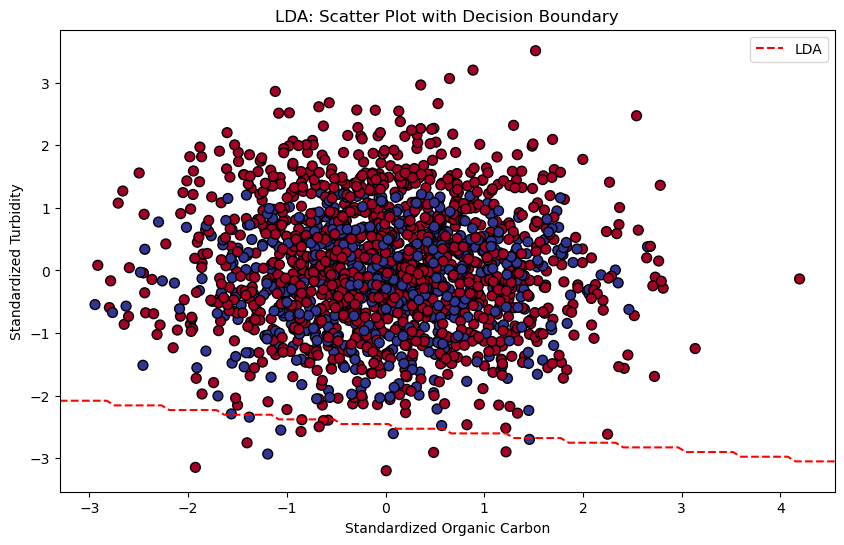

In [4]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from utils import add_decision_boundary

# Charger le dataset
df = pd.read_csv('../../data/data_preprocessed.csv')

# Sélectionner les colonnes pertinentes
df_ = df.drop(['Potability', 'Potability_det', 'Unnamed: 0'], axis=1)
features = ['Organic_carbon', 'Turbidity']
X = df[features]
y = df['Potability_det']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer et ajuster le modèle LDA
lda = LDA()
lda.fit(X_train_scaled, y_train)

# Faire des prédictions
y_pred = lda.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of LDA model: {accuracy:.2f}')

# Visualisation du scatterplot avec la frontière de décision
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k', s=50)
plt.title('LDA: Scatter Plot with Decision Boundary')
plt.xlabel('Standardized Organic Carbon')
plt.ylabel('Standardized Turbidity')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
add_decision_boundary(lda, label='LDA', color='red')

plt.show()


In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from utils import add_decision_boundary

# Charger le dataset
df = pd.read_csv('../../data/data_preprocessed.csv')

# Sélectionner les colonnes pertinentes
df_ = df.drop(['Potability', 'Potability_det', 'Unnamed: 0'], axis=1)
features = ['Organic_carbon', 'Turbidity']
X = df[features]
y = df['Potability']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer et ajuster le modèle LDA
lda = LDA()
lda.fit(X_train_scaled, y_train)

# Faire des prédictions
y_pred = lda.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of LDA model: {accuracy:.2f}')

# Visualisation du scatterplot avec la frontière de décision
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k', s=50)
plt.title('LDA: Scatter Plot with Decision Boundary')
plt.xlabel('Standardized Organic Carbon')
plt.ylabel('Standardized Turbidity')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
add_decision_boundary(lda, label='LDA', color='red')

plt.show()


 # Arbres de décision

# Random Forrest

# Régression logistique

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)
X = df_.drop(['Potability_det'], axis=1)  # Features
y = df_['Potability_det']  # Target variable

# Initialisation du normalisateur
scaler = StandardScaler()

# Ajustement aux données et transformation
X_normalized = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Initialisation du modèle de régression logistique
logreg = LogisticRegression(max_iter=1000)

# Entraînement du modèle sur l'ensemble d'entraînement
logreg.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Calcul de l'accuracy sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression on test set: {accuracy:.2f}')

# Cross-validation avec 5 folds
cv_scores = cross_val_score(logreg, X_normalized, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
df_ = df.drop(['Potability_det', 'Unnamed: 0'], axis=1)
X = df_.drop(['Potability'], axis=1)  # Features
y = df['Potability']  # Target variable

# Initialisation du normalisateur
scaler = StandardScaler()

# Ajustement aux données et transformation
X_normalized = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Initialisation du modèle de régression logistique
logreg = LogisticRegression(max_iter=1000)

# Entraînement du modèle sur l'ensemble d'entraînement
logreg.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Calcul de l'accuracy sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression on test set: {accuracy:.2f}')

# Cross-validation avec 5 folds
cv_scores = cross_val_score(logreg, X_normalized, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

## RL

In [5]:
df
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)
df_

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability_det
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,1
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,0
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0
...,...,...,...,...,...,...,...,...,...,...
2288,8.124208,207.509515,26489.114701,8.540837,318.059624,431.625677,10.075598,63.984225,4.724457,0
2289,10.391942,262.741770,39116.682706,3.205786,285.728420,473.313969,13.300688,65.318816,5.771715,0
2290,7.790875,196.478712,24061.349596,6.785685,350.117254,471.518536,15.343316,44.544627,3.076214,1
2291,6.139743,168.444214,23894.136010,9.494582,318.026087,494.129125,19.116022,60.264767,3.841222,0


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Charger votre dataset
# df_ = pd.read_csv('votre_fichier.csv')  # Assurez-vous que df_ est correctement chargé

# Calcul des corrélations avec la variable Potability_det
correlation_matrix = df_.corr()
correlations = correlation_matrix['Potability_det'].drop('Potability_det')
print("Correlations with Potability_det:\n", correlations)

# Sélection des variables avec une corrélation absolue supérieure à un seuil (par exemple 0.1)
selected_features = correlations[correlations.abs() > 0.1].index.tolist()
print("Selected features based on correlation:\n", selected_features)

# Préparation des données
X_selected = df_[selected_features]
y = df_['Potability_det']

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Modèle de régression logistique avec régularisation Ridge (L2)
logreg = LogisticRegression(max_iter=1000, penalty='l2', C=1.0)
logreg.fit(X_train, y_train)

# Prédictions
y_pred = logreg.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model with selected features:", accuracy)

# Validation croisée à 5 plis
cv_scores = cross_val_score(logreg, X_selected, y, cv=5)
print("5-fold Cross-validated accuracy (selected features):", cv_scores.mean())

Correlations with Potability_det:
 ph                 0.228487
Hardness           0.121582
Solids             0.006838
Chloramines       -0.311871
Sulfate           -0.021971
Conductivity       0.021411
Organic_carbon    -0.000963
Trihalomethanes   -0.254879
Turbidity         -0.137490
Name: Potability_det, dtype: float64
Selected features based on correlation:
 ['ph', 'Hardness', 'Chloramines', 'Trihalomethanes', 'Turbidity']
Accuracy of the logistic regression model with selected features: 0.7223837209302325
5-fold Cross-validated accuracy (selected features): 0.730477304944297


In [7]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Utiliser toutes les colonnes explicatives
X = df_.drop(columns=['Potability_det'])
y = df_['Potability_det']

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle de régression logistique avec régularisation Ridge (L2)
logreg = LogisticRegression(max_iter=1000, penalty='l2', C=1.0)
logreg.fit(X_train, y_train)

# Prédictions
y_pred = logreg.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model with all features:", accuracy)

# Validation croisée à 5 plis
cv_scores = cross_val_score(logreg, X, y, cv=5)
print("5-fold Cross-validated accuracy (all features):", cv_scores.mean())

Accuracy of the logistic regression model with all features: 0.7238372093023255
5-fold Cross-validated accuracy (all features): 0.7248099628012292


Accuracy: 0.7450980392156863
Précision: 0.7142857142857143
Rappel: 0.48484848484848486
F1-score: 0.5776173285198556


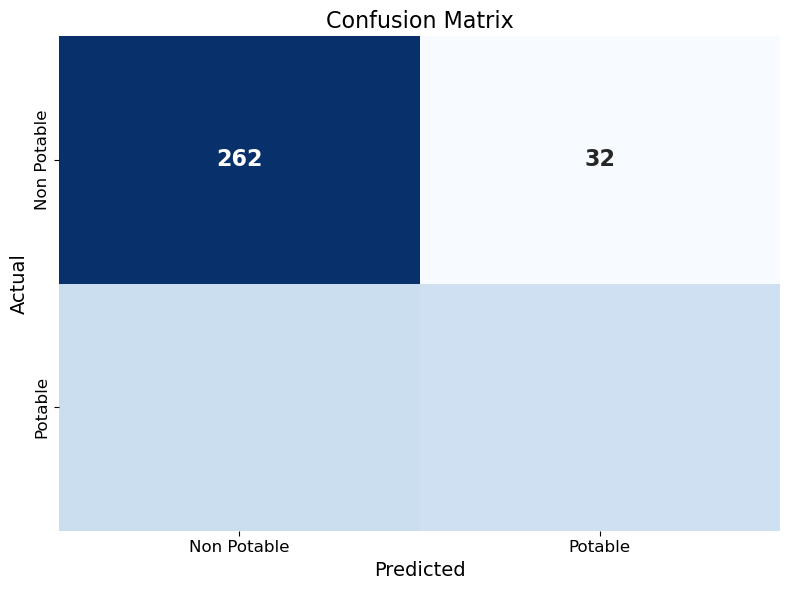

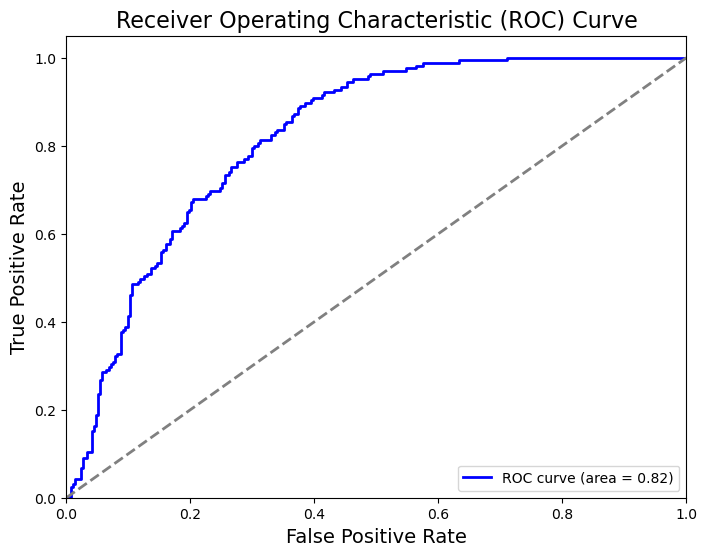

5-fold Cross-validated accuracy (all features): 0.7248099628012292


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Utiliser toutes les colonnes explicatives
X = df_.drop(columns=['Potability_det'])
y = df_['Potability_det']

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression logistique avec régularisation Ridge (L2)
logreg = LogisticRegression(max_iter=1000, penalty='l2', C=1.0)
logreg.fit(X_train, y_train)

# Prédictions
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("F1-score:", f1)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Potable', 'Potable'], yticklabels=['Non Potable', 'Potable'], cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuster le positionnement des annotations
for text in plt.gca().texts:
    text.set_size(16)
    text.set_weight('bold')
    text.set_verticalalignment('center')
    text.set_horizontalalignment('center')

plt.tight_layout()  # Pour s'assurer que tout est bien ajusté dans la figure
plt.show()

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()

# Validation croisée à 5 plis
cv_scores = cross_val_score(logreg, X, y, cv=5)
print("5-fold Cross-validated accuracy (all features):", cv_scores.mean())


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Utiliser toutes les colonnes explicatives
X = df_.drop(columns=['Potability_det'])
y = df_['Potability_det']

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression logistique avec régularisation Ridge (L2)
logreg = LogisticRegression(max_iter=1000, penalty='l2', C=1.0)
logreg.fit(X_train, y_train)

# Prédictions
y_pred = logreg.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage des valeurs de la matrice de confusion
tn, fp, fn, tp = cm.ravel()

print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("F1-score:", f1)

# Validation croisée à 5 plis
cv_scores = cross_val_score(logreg, X, y, cv=5)
print("5-fold Cross-validated accuracy (all features):", cv_scores.mean())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de la matrice de confusion avec les valeurs fournies
cm = np.array([[262, 32],
               [85, 80]])

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Potable', 'Potable'], yticklabels=['Non Potable', 'Potable'], cbar=False, annot_kws={"size": 16, "weight": "bold"})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Charger votre dataset
# df_ = pd.read_csv('votre_fichier.csv')  # Assurez-vous que df_ est correctement chargé

# Utiliser toutes les colonnes explicatives
X = df_.drop(columns=['Potability_det'])
y = df_['Potability_det']

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle de régression logistique
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Prédictions
y_pred = logreg.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Potable', 'Potable'], yticklabels=['Non Potable', 'Potable'], cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajuster le positionnement des annotations
for text in plt.gca().texts:
    text.set_size(16)
    text.set_weight('bold')

plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Charger votre dataset
# df_ = pd.read_csv('votre_fichier.csv')  # Assurez-vous que df_ est correctement chargé

# Utiliser toutes les colonnes explicatives
X = df_.drop(columns=['Potability_det'])
y = df_['Potability_det']

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle de régression logistique
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Prédictions
y_pred = logreg.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Potable', 'Potable'], yticklabels=['Non Potable', 'Potable'], cbar=False, annot_kws={"size": 16, "weight": "bold"})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
